In [5]:
# importing necessary libraries

# for dataframes

import numpy as np
import pandas as pd

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")


import json
import glob
import os


# for visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt

#importing the open cv
import cv2

#importing the tensor flow
import tensorflow as tf

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras   # for buidling the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout    # different layers of cnn
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix

In [7]:
# loading data 
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]  # lables of images present 
img_size = 224    # As this size is comfortable for transfer learning

def get_data(data_dir):
    
    '''
    a function to load the data on a recursive manner from filepath mentioned.
    '''
    
    data = []  # storing after retrival
    
    for label in labels: 
        path = os.path.join(data_dir, label) # the path of each label is joined with main directory name , output= str format 
        class_num = labels.index(label) # index of label , output int like 0,1,2....
        
        
        for img in os.listdir(path):     # command= take img from pathdirectory 
            try:
                
                # convert the image to array of numbers 
                img_arr = cv2.imread(os.path.join(path, img))
                
                # resize the image like padding process inorder to overcome the edge flaw, could be an hyper parameter.
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                
                # appending the resized image array along with it label index
                data.append([resized_arr, class_num])
                
            except Exception as e:
                print(e)
                
    return np.array(data)

In [9]:
data_dir='C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/train - Copy'
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]
img_size = 224

path = os.path.join(data_dir, 'angry')

class_num = labels.index('disgust')

for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, img))
    print('intial size of image is =',img_arr.size)
    
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    
    print('image size after resize which means padding =',resized_arr.size)
    
    break

intial size of image is = 6912
image size after resize which means padding = 150528


In [11]:
# our data has 2 parts namely test & train thus we retrieve in different folder
# fetching training and testing data

# fetch the train data
train = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/train - Copy')

# fetch the test data , naming val(validation) just like that ! 
val = get_data('C:/Users/YUVA RAVI/Face emotion recognition - DL/1. Raw dataset/test - Copy')

array([[[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [162, 162, 162]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [162, 162, 162]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [162, 162, 162]],

       ...,

       [[143, 143, 143],
        [143, 143, 143],
        [142, 142, 142],
        ...,
        [197, 197, 197],
        [200, 200, 200],
        [200, 200, 200]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [198, 198, 198],
        [201, 201, 201],
        [201, 201, 201]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [198, 198, 198],
        [201, 201, 201],
        [201, 201, 201]]

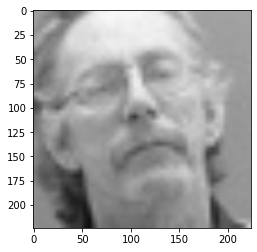

In [13]:
# check an image along with array

# plt.imread(train[0])   cannot read them as its already read

#plt.imshow(train[1]) we cannot show this as it is list of arrays stored

plt.imshow(train[1][0]) # show the image stored inside list

train[1][0]


array([[156, 156, 156],
       [156, 156, 156],
       [156, 156, 156],
       [157, 157, 157],
       [157, 157, 157],
       [158, 158, 158],
       [159, 159, 159],
       [158, 158, 158],
       [157, 157, 157],
       [155, 155, 155],
       [154, 154, 154],
       [152, 152, 152],
       [149, 149, 149],
       [146, 146, 146],
       [143, 143, 143],
       [140, 140, 140],
       [137, 137, 137],
       [134, 134, 134],
       [131, 131, 131],
       [128, 128, 128],
       [125, 125, 125],
       [122, 122, 122],
       [120, 120, 120],
       [117, 117, 117],
       [115, 115, 115],
       [112, 112, 112],
       [109, 109, 109],
       [105, 105, 105],
       [101, 101, 101],
       [ 97,  97,  97],
       [ 94,  94,  94],
       [ 96,  96,  96],
       [ 97,  97,  97],
       [ 99,  99,  99],
       [100, 100, 100],
       [102, 102, 102],
       [104, 104, 104],
       [107, 107, 107],
       [109, 109, 109],
       [111, 111, 111],
       [112, 112, 112],
       [111, 111

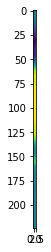

In [15]:
plt.imshow(train[1][0][0]) # we can see the images are plotted in cluster and clubbed together
train[1][0][0] # the computer understand only number , here we established communication to computer in form of numbers

Text(0.5, 1.0, 'surprise')

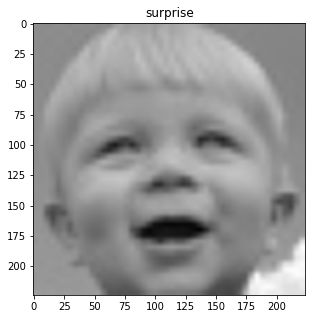

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(train[3134][0])
plt.title(labels[train[3134][1]])

In [19]:
#lets try to normalise one and output formal shall uint8

sample =train[1][0]  # sample dtype is unit8 checking after normalising

# (sample/255).dtype gives us float 64 output which blocks the calculation ahead and computationally difficult
normalized_sample=(sample/255).astype(np.float16)# if we use uint8 ,every data is nullified as their range in not float

#Half precision float: sign bit, 5 bits exponent, 10 bits mantissa = has been used to reduce the memory consumption
normalized_sample # in format of array

array([[[0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        ...,
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353]],

       [[0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        ...,
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353]],

       [[0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        [0.612 , 0.612 , 0.612 ],
        ...,
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353],
        [0.6353, 0.6353, 0.6353]],

       ...,

       [[0.5605, 0.5605, 0.5605],
        [0.5605, 0.5605, 0.5605],
        [0.5566, 0.5566, 0.5566],
        ...,
        [0.7725, 0.7725, 0.7725],
        [0.784 , 0.784 , 0.784 ],
        [0.784 , 0.784 , 0.784 ]],

       [[0.5605, 0.5605, 0.5605],
        [0.5605, 0.5605, 0.5605],
        [0.5605, 0.5605, 0.5605],
        .

## Data Preprocessing and Data Augumentation

In [21]:
train.shape  # 3135 images (stored in rows)  and only 2 labels (features,label) original form is (resized array and class_num)

(3135, 2)

In [23]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:  # creating list of images only from train 
  x_train.append(feature)     # x_train with array of numbers of images uploaded in X_train
  y_train.append(label)        # the label index are appended in par with list

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)


In [25]:
np.array(x_train).shape

(3135, 224, 224, 3)

In [26]:
train[0][0].shape 

(224, 224, 3)

In [27]:
# Normalize the data
x_train = (np.array(x_train) / 255).astype(np.float16)
x_val = (np.array(x_val) / 255).astype(np.float16)

In [28]:
# reshaping the array of  matrix
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [29]:
x_train[0]  # the values are normalised

array([[[0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        ...,
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ]],

       [[0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        ...,
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ]],

       [[0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        [0.8276, 0.8276, 0.8276],
        ...,
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ],
        [0.788 , 0.788 , 0.788 ]],

       ...,

       [[0.451 , 0.451 , 0.451 ],
        [0.451 , 0.451 , 0.451 ],
        [0.447 , 0.447 , 0.447 ],
        ...,
        [0.1098, 0.1098, 0.1098],
        [0.1098, 0.1098, 0.1098],
        [0.1098, 0.1098, 0.1098]],

       [[0.451 , 0.451 , 0.451 ],
        [0.451 , 0.451 , 0.451 ],
        [0.447 , 0.447 , 0.447 ],
        .

In [30]:
train[0]

array([array([[[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              [[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              [[211, 211, 211],
               [211, 211, 211],
               [211, 211, 211],
               ...,
               [201, 201, 201],
               [201, 201, 201],
               [201, 201, 201]],

              ...,

              [[115, 115, 115],
               [115, 115, 115],
               [114, 114, 114],
               ...,
               [ 28,  28,  28],
               [ 28,  28,  28],
               [ 28,  28,  28]],

              [[115, 115, 115],
               [115, 115, 115],
               [114, 114, 114],
               ...,
        

In [31]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [32]:
x_train.shape # no change in shape

(3135, 224, 224, 3)

In [33]:
print(datagen)

In [34]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3))) # convolutional layer
model.add(MaxPool2D())      # followed by pooling

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [35]:
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
opt = Adam(lr=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [109]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val)) 

Epoch 1/10
98/98 [==============================] - 218s 2s/step - loss: 1.9477 - accuracy: 0.1522 - val_loss: 1.9820 - val_accuracy: 0.0939
Epoch 2/10
98/98 [==============================] - 161s 2s/step - loss: 1.9409 - accuracy: 0.1624 - val_loss: 1.9453 - val_accuracy: 0.1602
Epoch 3/10
98/98 [==============================] - 160s 2s/step - loss: 1.9333 - accuracy: 0.1770 - val_loss: 1.9368 - val_accuracy: 0.1659
Epoch 4/10
98/98 [==============================] - 158s 2s/step - loss: 1.9223 - accuracy: 0.1946 - val_loss: 1.9273 - val_accuracy: 0.1764
Epoch 5/10
98/98 [==============================] - 160s 2s/step - loss: 1.9111 - accuracy: 0.2179 - val_loss: 1.9487 - val_accuracy: 0.1667
Epoch 6/10
98/98 [==============================] - 161s 2s/step - loss: 1.8953 - accuracy: 0.2322 - val_loss: 1.9257 - val_accuracy: 0.1909
Epoch 7/10
98/98 [==============================] - 166s 2s/step - loss: 1.8771 - accuracy: 0.2533 - val_loss: 1.8786 - val_accuracy: 0.2403
Epoch 8/10
98

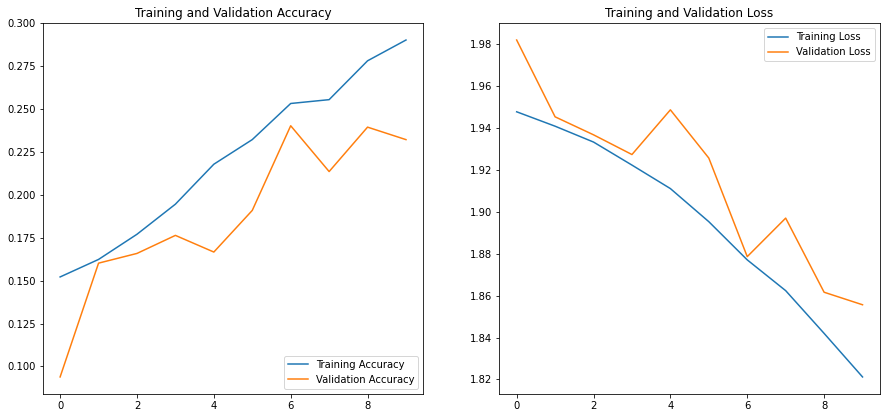

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [118]:
history.history['accuracy'] # accuracy of training have improved in each epochs

[0.1521531045436859,
 0.16236044466495514,
 0.17703349888324738,
 0.19457735121250153,
 0.21786284446716309,
 0.23221690952777863,
 0.2532695233821869,
 0.2555024027824402,
 0.27814993262290955,
 0.290271133184433]

In [119]:
history.history['val_accuracy'] # accuracy of test data have increased as well

[0.09385113418102264,
 0.16019417345523834,
 0.16585759818553925,
 0.1763754040002823,
 0.1666666716337204,
 0.19093851745128632,
 0.2402912676334381,
 0.21359223127365112,
 0.23948219418525696,
 0.23220065236091614]

#  Increase the epochs for same learning rate

In [36]:
opt = Adam(lr=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 35 , validation_data = (x_val, y_val)) 

Epoch 1/35
98/98 [==============================] - 168s 2s/step - loss: 1.9490 - accuracy: 0.1515 - val_loss: 1.9584 - val_accuracy: 0.1068
Epoch 2/35
98/98 [==============================] - 163s 2s/step - loss: 1.9317 - accuracy: 0.1847 - val_loss: 1.9376 - val_accuracy: 0.1820
Epoch 3/35
98/98 [==============================] - 167s 2s/step - loss: 1.9181 - accuracy: 0.2010 - val_loss: 1.9162 - val_accuracy: 0.1869
Epoch 4/35
98/98 [==============================] - 163s 2s/step - loss: 1.9035 - accuracy: 0.2089 - val_loss: 1.9282 - val_accuracy: 0.1828
Epoch 5/35
98/98 [==============================] - 165s 2s/step - loss: 1.8817 - accuracy: 0.2392 - val_loss: 1.9037 - val_accuracy: 0.2184
Epoch 6/35
98/98 [==============================] - 160s 2s/step - loss: 1.8627 - accuracy: 0.2616 - val_loss: 1.9453 - val_accuracy: 0.1909
Epoch 7/35
98/98 [==============================] - 160s 2s/step - loss: 1.8366 - accuracy: 0.2874 - val_loss: 1.9046 - val_accuracy: 0.2314
Epoch 8/35
98

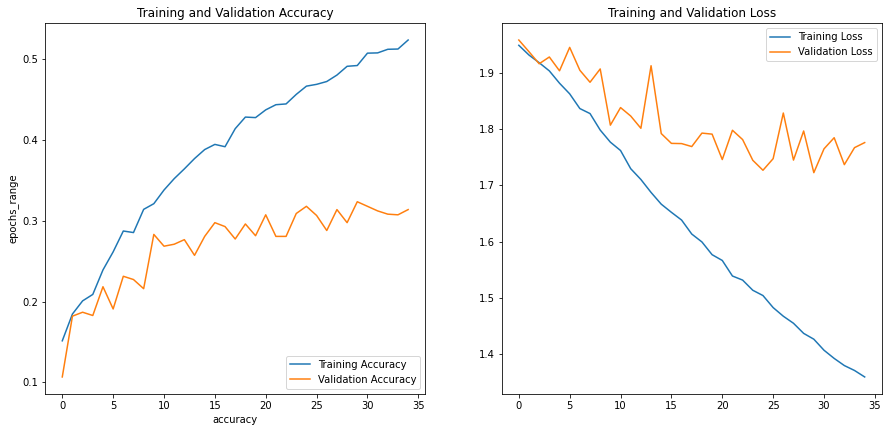

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs_range')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Here we can observe

1. Accuracy of testing and training is different hence the model is overfitting
2. Loss of testing and training are different which also is not generalised in testing data

# Implement transferlearning - VGG 16

In [44]:
from keras.applications.vgg16 import VGG16

from tensorflow.keras.optimizers import SGD,Adam

In [45]:
base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [46]:
base_model.trainable = False # we are including this to avoid the updation of weights with our data set

In [47]:
base_model.summary()  # input layer image array shape 224,224,3

# output layer = after multiple convolutions 7,7,512

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
model = tf.keras.Sequential([base_model,  # base model of vgg 16
                                 tf.keras.layers.GlobalAveragePooling2D(),  # poolling layer
                                 tf.keras.layers.Dropout(0.2),             # dropout performs like bagging decreases the overfitting
                                 tf.keras.layers.Dense(7, activation="softmax")   # softmax for multiclass classification                                  
                                ])

In [49]:
base_learning_rate = 0.0001    # base learning rate


model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1184s 12s/step - loss: 2.1641 - accuracy: 0.1365 - val_loss: 2.0582 - val_accuracy: 0.1772
Epoch 2/20
98/98 [==============================] - 1171s 12s/step - loss: 2.0187 - accuracy: 0.1506 - val_loss: 1.9743 - val_accuracy: 0.1942
Epoch 3/20
98/98 [==============================] - 1156s 12s/step - loss: 1.9823 - accuracy: 0.1643 - val_loss: 1.9495 - val_accuracy: 0.1521
Epoch 4/20
98/98 [==============================] - 1163s 12s/step - loss: 1.9689 - accuracy: 0.1627 - val_loss: 1.9399 - val_accuracy: 0.1578
Epoch 5/20
98/98 [==============================] - 1179s 12s/step - loss: 1.9577 - accuracy: 0.1707 - val_loss: 1.9346 - val_accuracy: 0.1545
Epoch 6/20
98/98 [==============================] - 1171s 12s/step - loss: 1.9615 - accuracy: 0.1691 - val_loss: 1.9305 - val_accuracy: 0.1788
Epoch 7/20
98/98 [==============================] - 1234s 13s/step - loss: 1.9631 - accuracy: 0.1675 - val_loss: 1.9266 - val_accuracy: 0.1845

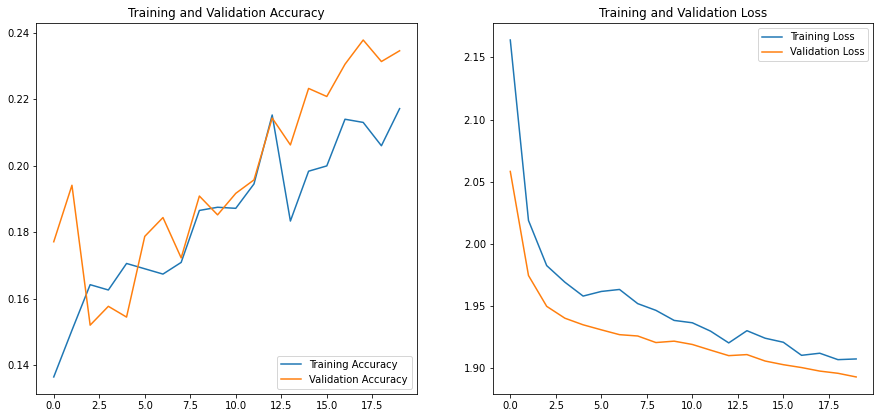

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()